<br>
<h1 style = "font-size:30px; font-weight : bold; color : black; text-align: center; border-radius: 10px 15px;"> Telco Customer Churn: EDA, Predictions and Feature Importance with SHAP </h1>
<br>

# Goals
Perform an Exploratory Data Analysis (EDA) to visualize and understand:
* The distribution of values of the target and features;
* The relationship between each feature and the likelihood of customer churn.

Predict churn using 20% of data as test set using the following models:
* Logistic Regression;
* Random Forest;
* XGBoost;
* Catboost.

Understand how each feature impacts the predicted value using:
* Feature Importance;
* SHAP.

# <a id='0'>Content</a>

- <a href='#1'>Dataset Information</a>  
- <a href='#2'>Importing Packages and Dataset + Data Cleaning</a>  
- <a href='#3'>Exploratory Data Analysis</a>  
    - <a href='#31'>Demographic Features</a>  
    - <a href='#32'>Services Related Features</a>
    - <a href='#33'>Account Information Features (categorical)</a>
    - <a href='#34'>Account Information Features (numerical)</a>
- <a href='#4'>Creating and Evaluating Models</a>
    - <a href='#41'>Logistic Regression</a> 
    - <a href='#42'>Random Forest</a>
    - <a href='#43'>Random Forest w/preprocessing</a>
    - <a href='#44'>XGBoost</a> 
    - <a href='#45'>CatBoost</a> 
    - <a href='#46'>Feature Importance and SHAP Plot</a>     
- <a href='#5'>References</a>

## <center> If you find this notebook useful, support with an upvote! <center>

# <a id="1">Dataset Information</a> 


### Content

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

# <a id="2">Importing Packages and Dataset + Data Cleaning</a> 

In [3]:
import pandas as pd 
import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from catboost import Pool

import shap

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'xgboost'

In [5]:
df = pd.read_csv('../data/raw/data.csv')

In [6]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,148,Male,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,45.65,45.65,Yes
1,463,Male,0,Yes,Yes,4,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,101.15,385.90,Yes
2,471,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.60,No
3,496,Male,0,No,No,22,No,No phone service,DSL,No,...,Yes,No,No,Yes,One year,Yes,Bank transfer (automatic),43.75,903.60,Yes
4,833,Female,0,Yes,Yes,70,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),74.10,5222.30,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6490,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,18.85,18.85,Yes
7039,6634,Female,0,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.50,74.50,Yes
7040,6638,Male,0,Yes,No,69,Yes,No,DSL,Yes,...,No,No,No,No,One year,Yes,Credit card (automatic),53.65,3804.40,No
7041,6721,Male,0,Yes,Yes,70,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,84.10,5979.70,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Apparently, there are no missing values. But there is clearly an error. ‘Total Charges’ should be numeric. We can use pd.to_numeric to convert it.

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].dtype

dtype('float64')

After changing a column from string to numeric, some values may not be recognized, resulting in missing values. Let’s check if this happened.

In [9]:
df['TotalCharges'].isnull().sum()

11

Now there are supposedly 11 missing values, but they might indicate that there were no charges for that customer up to the point when the data was obtained. The feature 'tenure' indicates for how long someone has been a customer. Let's check the number of samples with value '0' on that feature and, in case we also find 11 customers, compare if their index match those from the 'missing' values.

In [10]:
df['tenure'].isin([0]).sum()

11

In [11]:
print(df[df['tenure'].isin([0])].index)
print(df[df['TotalCharges'].isna()].index)

Int64Index([768, 928, 1783, 2177, 2332, 2424, 2483, 2540, 2905, 2985, 4924], dtype='int64')
Int64Index([768, 928, 1783, 2177, 2332, 2424, 2483, 2540, 2905, 2985, 4924], dtype='int64')


We got a match here. After confirming our suspects, we can replace those missing values with '0'.

In [12]:
df.loc[:,'TotalCharges'] = df.loc[:,'TotalCharges'].replace(np.nan,0)
df['TotalCharges'].isnull().sum()

0

The feature 'Senior Citizen', which is categorical ('Yes' or 'No'), is set as numeric. Although all features will be changed to numeric to be used in our prediction models, I'll convert it from numeric to string for now.

In [13]:
df['SeniorCitizen'] = df['SeniorCitizen'].apply(str)
senior_map = {'0': 'No', '1': 'Yes'}
df['SeniorCitizen'] = df['SeniorCitizen'].map(senior_map)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Let's finish this section by checking the possible values of categorical features and viewing descriptive statistics (df.describe) for numerical features.

In [14]:
for col in df.select_dtypes('object').columns:
    print(col, '- # unique values:', df[col].nunique())

gender - # unique values: 2
SeniorCitizen - # unique values: 2
Partner - # unique values: 2
Dependents - # unique values: 2
PhoneService - # unique values: 2
MultipleLines - # unique values: 3
InternetService - # unique values: 3
OnlineSecurity - # unique values: 3
OnlineBackup - # unique values: 3
DeviceProtection - # unique values: 3
TechSupport - # unique values: 3
StreamingTV - # unique values: 3
StreamingMovies - # unique values: 3
Contract - # unique values: 3
PaperlessBilling - # unique values: 2
PaymentMethod - # unique values: 4
Churn - # unique values: 2


In [15]:
for col in df.select_dtypes('object').columns:
    print(col, '\n')
    print(df[col].value_counts(), '\n')

gender 

Male      3555
Female    3488
Name: gender, dtype: int64 

SeniorCitizen 

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64 

Partner 

No     3641
Yes    3402
Name: Partner, dtype: int64 

Dependents 

No     4933
Yes    2110
Name: Dependents, dtype: int64 

PhoneService 

Yes    6361
No      682
Name: PhoneService, dtype: int64 

MultipleLines 

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

InternetService 

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

OnlineSecurity 

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 

OnlineBackup 

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64 

DeviceProtection 

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype:

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customerID,7043.0,3522.000000,2033.283305,1.00,1761.50,3522.00,5282.50,7043.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


# <a id="3">Exploratory Data Analysis</a> 

We will start our EDA by looking at the distribution of the target variable (Churn). It’s expected that the dataset is imbalanced, with less than 50% of the customers leaving the company

## Churn

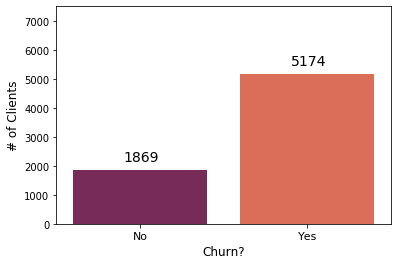

In [18]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x="Churn", data=df, palette="rocket")

plt.xlabel("Churn?", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,7500)
plt.xticks([0,1], ['No', 'Yes'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 14)
    
plt.show()

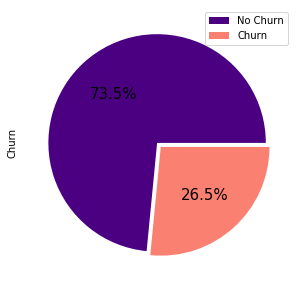

In [19]:
plt.figure(figsize=(7,5))

df['Churn'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['indigo','salmon'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['No Churn', 'Churn'])
plt.show()

At the period represented in this dataset, there is a 26,5% of customer churn. As we move on to analyze the features, we can compare this number with the percentage of churn found for each category, providing us a better idea on the impact of a given feature in the company’s ability to retain its customers.

In [20]:
#Label encoding Churn to use sns.barplot
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

We can divide the features into the following groups:
- Demographic features;
- Services related features
- Account information related features (categorical and numerical).

For each group, we’ll start by looking at the features’ distributions. Then, we’ll check the percentage of churn for each category to understand their relationship with the target.

In [21]:
demo_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

serv_features = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup'
                , 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

cat_accinfo_features = ['Contract', 'PaperlessBilling', 'PaymentMethod']

num_accinfo_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

## <a id="31">Demographic Features</a> 

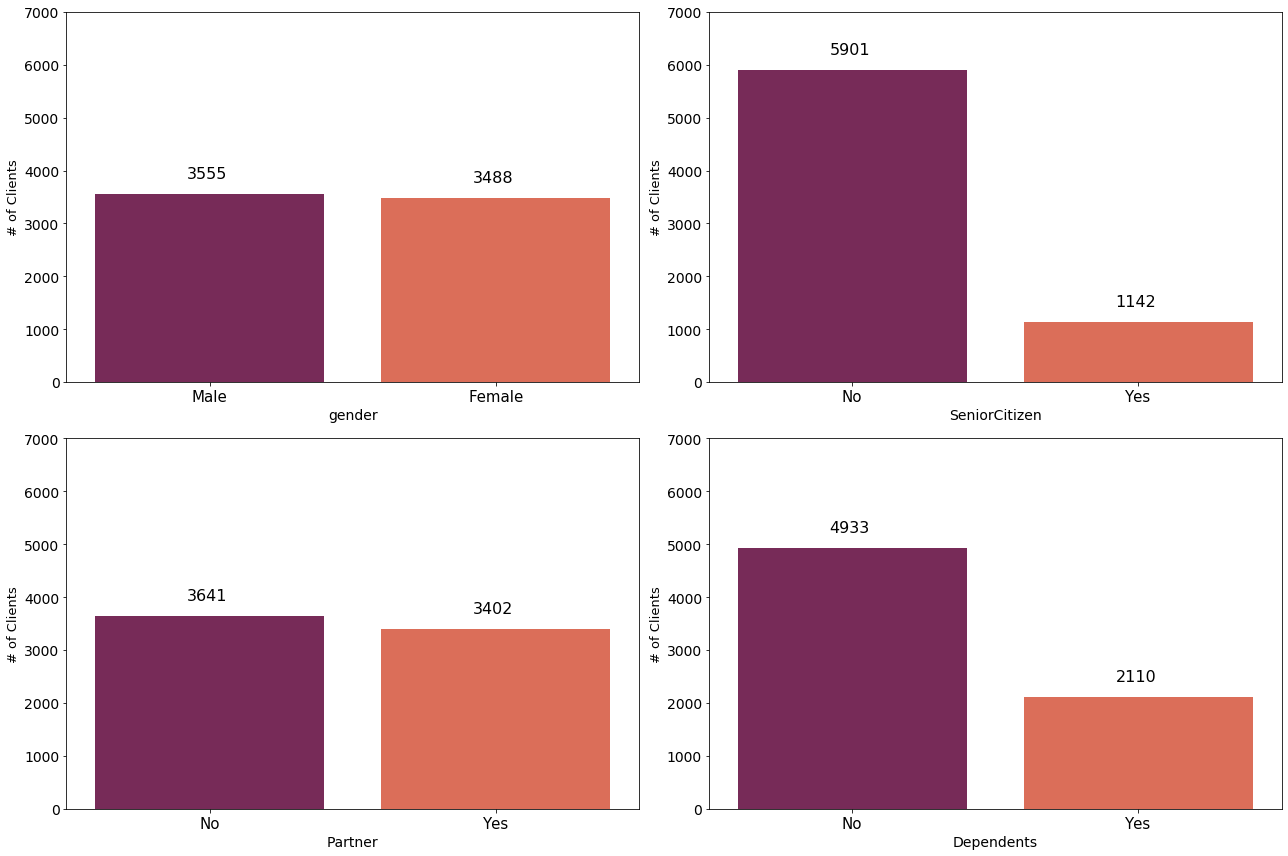

In [22]:
plt.figure(figsize=(18,12))

for i,col in enumerate(demo_features):    
    plt.subplot(2,2,i + 1)
    
    ax = sns.countplot(data = df, x = col, palette = 'rocket')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 15)
    plt.yticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+300), fontsize= 16)

plt.tight_layout()

plt.show()

In [19]:
plt.figure(figsize=(18,12))

for i,col in enumerate(demo_features):    
    plt.subplot(2,2,i + 1)
    
    ax = sns.countplot(data = df, x = col, hue="Churn", palette = 'rocket')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.14, p.get_height()+300), fontsize= 14)

plt.tight_layout()

plt.show()

In [20]:
plt.figure(figsize=(16,10))

for i,col in enumerate(demo_features):    
    plt.subplot(2,2,i + 1)
    
    ax = sns.barplot(x = col, y = "Churn", data = df, palette = 'rocket', ci = None)

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("% of Churn", fontsize= 13)
    plt.ylim(0,0.5)
    plt.xticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=15)

plt.tight_layout()

plt.show()

What we can observe for each feature:
- Gender: There is barely any difference in churn percentage between men and women;
- Senior Citizen: The churn percentage for senior customers are above 40%, indicating a high likelihood of churn from that group;
- Partner: Single customers are more likely to churn than customers with partners;
- Dependents: Customers with dependents are less likely to churn than customers without any dependents.

We could go a little further and combine the two ‘family-related’ features, ‘Partner’ and ‘Dependents’ to see if, in fact, both of them contribute to the chance of customer churn or retention.

It is expected that the majority of customers with dependents are married and, for instance, it could be that the partnership has more influence on the target than the fact that a customer has or hasn’t a child.  Although this might be unlikely, by analyzing both features together, we can discard such hypothesis with more confidence.

In [21]:
df.groupby(['Partner'])['Dependents'].value_counts()

As expected, most customers with dependents also have a partner. Yet, the number of single customers with dependents seems significant enough for us to draw some conclusions about this particular group.

In [22]:
df.groupby(by=['Partner', 'Dependents'])['Churn'].value_counts(normalize = True)

In [23]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "Dependents", y = "Churn", hue = "Partner", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Churn", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.15, p.get_height()+0.03),fontsize=14)

plt.show()

We can see that both features contribute to the likelihood of churn. The group of people with partners and dependents and the group with neither of those are on the extremes in terms of likelihood of churn (14% and 34%, respectively). The churn of customers with partners and without dependents falls close to the overall percentage of churn in our dataset, while the ‘opposite’ group still have a lower chance of it.

## <a id="32">Services Related Features</a> 

In [24]:
plt.figure(figsize=(18,30))

for i,col in enumerate(serv_features):    
    plt.subplot(5,2,i + 1)
    
    ax = sns.countplot(data = df, x = col, palette = 'rocket')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,7500)
    plt.xticks(fontsize= 15)
    plt.yticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.31, p.get_height()+300), fontsize= 16)

plt.tight_layout()

plt.show()

A relatively small group of customers doesn’t have internet services and an even smaller one doesn’t have phone services. One thing to keep in mind is that most services can be and/or are only provided to customers who sign the Telco’s internet service.

In [25]:
plt.figure(figsize=(18,30))

for i,col in enumerate(serv_features):    
    plt.subplot(5,2,i + 1)
    
    ax = sns.countplot(data = df, x = col, hue="Churn", palette = 'rocket')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+300), fontsize= 13)

plt.tight_layout()

plt.show()

In [26]:
plt.figure(figsize=(16,25))

for i,col in enumerate(serv_features):    
    plt.subplot(5,2,i + 1)
    
    ax = sns.barplot(x = col, y = "Churn", data = df, palette = 'rocket', ci = None)

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("% of Churn", fontsize= 13)
    plt.ylim(0,0.5)
    plt.xticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.32, p.get_height()+0.03),fontsize=15)

plt.tight_layout()

plt.show()

Curiously enough, the difference of churn between clients with and without phone services is quite small, been negligible if we take those with multiple lines out of equation. In this group of features, the real game-changing ones in terms of customer retainment are those related to internet services.

In the feature ‘InternetServices’, the percentage of churn in each category is highly different one from another. Those who don’t subscribe to the company’s internet (presumably, they only use their phone service), are the most likely to endure as their customers. The likelihood of churn from customers with DSL service is also smaller than the overall probability. 

The highest percentage of churn, with over 40%, is from customers with fiber optic internet. Fiber optic tends to be faster than DSL internet, but their subscription is usually more expensive as well. We don't have the information about the fee for each service, but at least we can find the mean value of monthly charges per type of internet just to have an idea that this is the case.


In [27]:
df.groupby(by=['InternetService'])['MonthlyCharges'].mean().sort_values()

As expected, the average charges for each service are significantly different, with fiber optic been the most expensive. Without any additional information, it’s hard to draw definitive conclusions, but it seems that the cost-benefit relationship of their fiber optic service is far from been attractive enough to retain customers.

Such a high churn rate might indicate that their service’s quality is subpar in terms of speed and/or reliability. Analyzing complaints received by their customer service call center service to extract useful and specific information about their internet is a must. A survey with a significant group of customers, aiming to understand how they perceive the quality of the service, is another step to find the problem and to help defining the course of action.

As for the other services, the likelihood of churn from customers who have each one of them is actually lower than from those who haven’t. The higher differences are found in ‘TechSupport’ and ‘OnlineSecurity’, while the lower ones are found in the streaming services.

Let’s calculate the average monthly charges from each category in the Tech Support and Online Security features.

In [28]:
print(df.groupby(by=['TechSupport'])['MonthlyCharges'].mean().sort_values(), '\n')
print(df.groupby(by=['OnlineSecurity'])['MonthlyCharges'].mean().sort_values(), '\n')
print(df.groupby(by=['OnlineSecurity', 'TechSupport'])['MonthlyCharges'].mean().sort_values())

Both services don’t seem to affect the subscription charges by much. If the company can quantify the cost of providing each service per customer and find out that it is relatively small, they could either reduce the extra subscription fee for those additional services or simply cut that fee and offer those services as standard for internet customers for a trial period. Given that most customers don’t subscribe to those services and given that they have a significant impact on the customer retainment, it’s possible that such strategy could result in a higher profit on the long term.

Let’s see if the churn rate gets significantly lower for customers who have access to both services.

In [29]:
print(df.groupby(by=['TechSupport'])['OnlineSecurity'].value_counts(), '\n')

In [30]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "TechSupport", y = "Churn", hue = "OnlineSecurity", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Churn", fontsize= 12)
plt.ylim(0,1.0)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.070, p.get_height()+0.03),fontsize=14)

plt.show()

The differences in terms of churn rate are quite significant. While customers who don’t use neither of those services have a close to 50% chance of churn, the churn rate for those who have both is lower than 10%, supporting the previous point.

## <a id="33">Account Information Features (categorical)</a> 

In [31]:
plt.figure(figsize=(12,15))

for i,col in enumerate(cat_accinfo_features):    
    plt.subplot(3,1,i + 1)
    
    ax = sns.countplot(data = df, x = col, palette = 'rocket')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,5000)
    plt.xticks(fontsize= 14)
    plt.yticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+300), fontsize= 15)

plt.tight_layout()

plt.show()

In [32]:
plt.figure(figsize=(12,15))

for i,col in enumerate(cat_accinfo_features):    
    plt.subplot(3,1,i + 1)
    
    ax = sns.countplot(data = df, x = col, hue="Churn", palette = 'rocket')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,5000)
    plt.xticks(fontsize= 13)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.135, p.get_height()+300), fontsize= 14)

plt.tight_layout()

plt.show()

In [33]:
plt.figure(figsize=(12,15))

for i,col in enumerate(cat_accinfo_features):    
    plt.subplot(3,1,i + 1)
    
    ax = sns.barplot(x = col, y = "Churn", data = df, palette = 'rocket', ci = None)

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("% of Churn", fontsize= 13)
    plt.ylim(0,0.55)
    plt.xticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.32, p.get_height()+0.02),fontsize=15)

plt.tight_layout()

plt.show()

Naturally, in terms of contract, the highest churn rate is from the ‘month-to-month’ type, which is also the most dominant contract. What seems odd is the high chance of churn from customers who choose electronic check as payment method and opts for paperless billing. It could be, for instance, that most customers in the month-to-month contract also fall into those categories. We can check that.

In [34]:
print(df.groupby(by=['Contract'])['PaperlessBilling'].value_counts(normalize = True),' \n')
print(df.groupby(by=['Contract'])['PaymentMethod'].value_counts(normalize = True))

When we group the dataset by contract, we can see that the percentage of customers who don’t receive their bills through the mail and that pay them via electronic check is higher for the ‘month-to-month’ type. Yet, this doesn’t seem to be enough to justify such a high churn rate for those categories. There is a good chance that we will find higher percentages of churn in them, regardless of the type of contract. Let’s see.

In [35]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "PaperlessBilling", y = "Churn", hue = "Contract", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Churn", fontsize= 12)
plt.ylim(0,0.6)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.08, p.get_height()+0.03),fontsize=14)

plt.show()

In [36]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "PaymentMethod", y = "Churn", hue = "Contract", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Churn", fontsize= 12)
plt.ylim(0,0.6)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.05, p.get_height()+0.020),fontsize=14)

plt.show()

The likelihood of churn is, in fact, higher for those categories, regardless of type of contract. Personally, is hard for me to see a causality, without additional information or domain knowledge, between the churn rate and the way someone receives their bill and choose to pay them. It is more likely that those two features are associated with several others. The internet service, a feature with notable differences of churn rate between each one of its categories, could present some correlation between them.

In [37]:
print(df.groupby(by=['InternetService'])['PaperlessBilling'].value_counts(normalize = True), '\n')
print(df.groupby(by=['InternetService'])['PaymentMethod'].value_counts(normalize = True))

What stands out here in our grouping operations:
- Customers with Internet Service = ‘No’: Less than 30% receive paperless bills and only 8% pay them with electronic check;
- Customers with Internet Service = ‘Fiber Optic’: 77% receive paperless bills and more them 51% pay them with electronic check.

We can recall that the lowest churn rate in the internet services feature is from those customers who don’t use Telco’s internet, while the highest is found among those who use their fiber optic internet. So, we can say that those results don’t come out as a surprise. 

Although we shouldn’t conclude that the payment method or the way the bills are sent have a direct influence in the customer retainment, it is worth to point that those features will probably be useful for our prediction models.

## <a id="34">Account Information Features (numerical)</a> 

In [38]:
plt.figure(figsize=(12,15))

for i,col in enumerate(num_accinfo_features):    
    plt.subplot(3,1,i + 1)
    sns.distplot(df.loc[:,col])
    #plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation    
    plt.ylabel('')
    plt.tight_layout()

plt.show()

In [39]:
plt.figure(figsize=(12,15))

for i,col in enumerate(num_accinfo_features):    
    plt.subplot(3,1,i + 1)    
    sns.kdeplot(df.loc[(df['Churn'] == 0), col], label = 'No Churn', shade = True)
    sns.kdeplot(df.loc[(df['Churn'] == 1), col], label = 'Churn', shade = True)
    plt.legend()
    plt.ylabel('')
    plt.tight_layout()

plt.show()

What we can observe for each feature:
- Tenure: High concentration of churned customer in the first months.
- Monthly Charges: High concentration of churned customer in higher values (around 60 and beyond)
- Total Charges: Somewhat similar distributions, but the ‘No churn’ distribution have lower values.

Let’s get the mean values to complement our analysis.

In [40]:
print(df.groupby(by=['Churn'])['tenure'].mean().sort_values(), '\n')
print(df.groupby(by=['Churn'])['MonthlyCharges'].mean().sort_values(), '\n')
print(df.groupby(by=['Churn'])['TotalCharges'].mean().sort_values())

As expected, the average tenure period for churned customers is lower and the average monthly charges are higher than the same metrics for retained customers. The average total charges are lower for churned customers, which is probably due to their lower tenure.

The density plot for churned customers in the ‘tenure’ feature showed a high concentration in the first months. Let’s divide this feature in bins to get the churn rate per year of service.

In [41]:
df['tenure_bin'] = pd.cut(df['tenure'],[-1,12,24,36,48,60,100])
df['tenure_bin'].value_counts(sort = False)

In [42]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "tenure_bin", y = "Churn", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Churn", fontsize= 12)
plt.ylim(0,0.6)
plt.xticks([0,1,2,3,4,5], ['12 or less', '13 to 24', '25 to 36', '37 to 48', '49 to 60', 'more than 60'], fontsize = 12)
plt.xlabel("Tenure Group (in months)", fontsize= 12)



for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=14)

plt.show()

Almost 50 percent of those who became a customer for a year or less ended up leaving the company. It’s not unusual to have a higher churn rate in the first year or two for some types of business. Nevertheless, a churn rate this high in the first year indicates that the quality of the service provided fails to hold up to their new customers’ expectation.

# <a id="4">Creating and Evaluating Models</a>

Now, let's move on to the predictive models. In this notebook, we will use the Area Under the Curve of Receiver Characteristic Operator (AUC-ROC or ROC-AUC) as the main metric to assess the performance of our models. The ROC-AUC measures the ability of a model is to distinguish between classes. [(Link for more information about ROC-AUC)](https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/). Nevertheless, we will also check the accuracy, the classification report and the confusion matrix for each model.

First, we will make a copy of the dataset and separate the features from the target.

In [43]:
X = df.copy().drop('Churn', axis = 1)
Y = df['Churn'].copy()

We’re also going to remove the customer_id and the feature ‘tenure_bin’, that we created for EDA purposes, since we’re not planning to use them

In [44]:
X = X.drop(['customerID', 'tenure_bin'], axis = 1)
X

In [45]:
X.info()

We need to encode the features to use them in our models. We could use something like sklearn’s OrdinalEncoder for this, but I’ll do it manually. This effort will pay off later when we’ll analyze the predictions using SHAP.

In [46]:
gender_map = {'Female': 0, 'Male': 1}
yes_or_no_map = {'No': 0, 'Yes': 1} #seniorcitizen, partner, dependents, phoneservice, paperlessbilling
multiplelines_map = {'No phone service': -1, 'No': 0, 'Yes': 1}
internetservice_map = {'No': -1, 'DSL': 0, 'Fiber optic': 1}
add_netservices_map = {'No internet service': -1, 'No': 0, 'Yes': 1} #onlinesecurity, onlinebackup, deviceprotection,techsupport,streaming services
contract_map = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
paymentmethod_map = {'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3}


X['gender'] = X['gender'].map(gender_map).astype('int')
X['Partner'] = X['Partner'].map(yes_or_no_map).astype('int')
X['SeniorCitizen'] = X['SeniorCitizen'].map(yes_or_no_map).astype('int')
X['Dependents'] = X['Dependents'].map(yes_or_no_map).astype('int')
X['PhoneService'] = X['PhoneService'].map(yes_or_no_map).astype('int')
X['MultipleLines'] = X['MultipleLines'].map(multiplelines_map).astype('int')
X['InternetService'] = X['InternetService'].map(internetservice_map).astype('int')
X['OnlineSecurity'] = X['OnlineSecurity'].map(add_netservices_map).astype('int')
X['OnlineBackup'] = X['OnlineBackup'].map(add_netservices_map).astype('int')
X['DeviceProtection'] = X['DeviceProtection'].map(add_netservices_map).astype('int')
X['TechSupport'] = X['TechSupport'].map(add_netservices_map).astype('int')
X['StreamingTV'] = X['StreamingTV'].map(add_netservices_map).astype('int')
X['StreamingMovies'] = X['StreamingMovies'].map(add_netservices_map).astype('int')
X['Contract'] = X['Contract'].map(contract_map).astype('int')
X['PaperlessBilling'] = X['PaperlessBilling'].map(yes_or_no_map).astype('int')
X['PaymentMethod'] = X['PaymentMethod'].map(paymentmethod_map).astype('int')


In [47]:
X.info()

Now we will split the data into train and test sets.

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42
                                                    , stratify = Y)

## <a id="41">Logistic Regression</a> 

The first model we're going to use is Logistic Regression, which will require two things for a better performance:
- Scaling the numerical features;
- (One hot) encoding the categorical (nominal) features.

We can use the Column Transformer to assign each transformation to its correct features and fit it in a pipeline as a preprocessing step.

In [49]:
num_features = num_accinfo_features

cat_3p_features = []
for col in X.columns:
    if (X[col].nunique() > 2) & (X[col].nunique() < 5):  #less than 5 to exclude the numerical features
        cat_3p_features.append(col)
print('Numerical features: ', num_features, '\n')        
print('Nominal with 3 or more categories: ', cat_3p_features)

In [50]:
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_3p_features)      
    ], remainder='passthrough')

In [51]:
lr_pipe = Pipeline([('Transformers', preprocessor)
                        ,('LR',  LogisticRegression(random_state = 42, max_iter = 1000))])

Even without the intent of doing an extensive hyperparameter tuning, we can give each model a better chance of good performance by testing some values for a key parameter and choosing one of them based on cross-validation score.

In [52]:
def cv_function (model, param, list):
    
    rp_st_kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats = 3, random_state = 42)
    search_model = model
    print ('Hyperparameter: ', param)
    
    for i in list:
        param_dict = {param : i}
        search_model.set_params(**param_dict)    
        cv_score = cross_val_score(search_model, X_train, Y_train, cv=rp_st_kfold, scoring='roc_auc')
        print("Parameter: {0:0.2f} - AUC(SD): {1:0.4f} ({2:0.4f})". format(i, cv_score.mean(), cv_score.std()))
        
params_lr_list = [0.01,0.1,0.2,0.3,0.5,0.7,1,2,3,5]
param_lr = 'LR__C'
cv_function(lr_pipe, param_lr, params_lr_list)

After some point, there is barely an improvement. Choice: C = 3.0

In [53]:
lr_param = {'LR__C': 3.0}
lr_pipe.set_params(**lr_param) 
lr_pipe

Now, let’s fit this model and predict.

In [54]:
lr_pipe.fit(X_train, Y_train)
pred_lr = lr_pipe.predict(X_test)

print("Test Accuracy: ",metrics.accuracy_score(Y_test, pred_lr))

In [55]:
lr_confusion_matrix = metrics.confusion_matrix(Y_test, pred_lr)
sns.heatmap(lr_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [56]:
print(metrics.classification_report(Y_test, pred_lr, labels = [0, 1]))

In [57]:
lr_pred_proba = lr_pipe.predict_proba(X_test)[:,1]

lr_roc_auc = metrics.roc_auc_score(Y_test, lr_pred_proba)
print('ROC_AUC: ', lr_roc_auc)

lr_fpr, lr_tpr, thresholds = metrics.roc_curve(Y_test, lr_pred_proba)

plt.plot(lr_fpr,lr_tpr, label = 'ROC_AUC = %0.3f' % lr_roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

## <a id="42">Random Forest</a> 

For every model, we’re going to follow the same steps that we made with Logistic Regression, with the exception of using a pipeline for preprocessing.

In [58]:
rf_model = RandomForestClassifier(random_state = 42)

params_rf_list = [100,150,200,250,300,400,500]
param_rf = 'n_estimators'
cv_function(rf_model, param_rf, params_rf_list)

In [59]:
rf_param = {'n_estimators': 500}
rf_model.set_params(**rf_param) 
rf_model

In [60]:
rf_model.fit(X_train, Y_train)
pred_rf = rf_model.predict(X_test)

print("Test Accuracy: ",metrics.accuracy_score(Y_test, pred_rf))

In [61]:
rf_confusion_matrix = metrics.confusion_matrix(Y_test, pred_rf)
sns.heatmap(rf_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [62]:
print(metrics.classification_report(Y_test, pred_rf, labels = [0, 1]))

In [63]:
rf_pred_proba = rf_model.predict_proba(X_test)[:,1]

rf_roc_auc = metrics.roc_auc_score(Y_test, rf_pred_proba)
print('ROC_AUC: ', rf_roc_auc)

rf_fpr, rf_tpr, thresholds = metrics.roc_curve(Y_test, rf_pred_proba)

plt.plot(rf_fpr,rf_tpr, label = 'ROC_AUC = %0.3f' % rf_roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

The results we found with Random Forest were quite disappointing. Although feature scaling and one hot encoding aren’t necessary, we can use them just for testing purposes.

## <a id="43">Random Forest with Preprocessing</a> 

In [64]:
rf_pipe = Pipeline([('Transformers', preprocessor)
                        ,('RF',  RandomForestClassifier(n_estimators = 500, random_state = 42))])

rf_pipe.fit(X_train, Y_train)
pred_rf_pipe = rf_pipe.predict(X_test)

print("Test Accuracy: ",metrics.accuracy_score(Y_test, pred_rf_pipe))

In [65]:
rf_pipe_confusion_matrix = metrics.confusion_matrix(Y_test, pred_rf_pipe)
sns.heatmap(rf_pipe_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [66]:
print(metrics.classification_report(Y_test, pred_rf_pipe, labels = [0, 1]))

In [67]:
rf_pipe_pred_proba = rf_pipe.predict_proba(X_test)[:,1]

rf_pipe_roc_auc = metrics.roc_auc_score(Y_test, rf_pipe_pred_proba)
print('ROC_AUC: ', rf_pipe_roc_auc)

rf_pipe_fpr, rf_pipe_tpr, thresholds = metrics.roc_curve(Y_test, rf_pipe_pred_proba)

plt.plot(rf_pipe_fpr,rf_pipe_tpr, label = 'ROC_AUC = %0.3f' % rf_pipe_roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

It did not go too well either. Let’s move on to the boosting models.

## <a id="44">XGBoost</a> 

In [68]:
xgb_model = XGBClassifier(learning_rate = 0.05 ,random_state = 42, eval_metric = 'logloss')

params_xgb_list = [50,75,100,150,200,250,300]
param_xgb = 'n_estimators'
cv_function(xgb_model, param_xgb, params_xgb_list)

In [69]:
xgb_param = {'n_estimators': 75}
xgb_model.set_params(**xgb_param) 
xgb_model

In [70]:
xgb_model.fit(X_train, Y_train, eval_set = [(X_test,Y_test)])

pred_xgb = xgb_model.predict(X_test)

print("Test Accuracy: ",metrics.accuracy_score(Y_test, pred_xgb))

In [71]:
xgb_confusion_matrix = metrics.confusion_matrix(Y_test, pred_xgb)
sns.heatmap(xgb_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [72]:
print(metrics.classification_report(Y_test, pred_xgb, labels = [0, 1]))

In [73]:
xgb_pred_proba = xgb_model.predict_proba(X_test)[:,1]

xgb_roc_auc = metrics.roc_auc_score(Y_test, xgb_pred_proba)
print('ROC_AUC: ', xgb_roc_auc)

xgb_fpr, xgb_tpr, thresholds = metrics.roc_curve(Y_test, xgb_pred_proba)

plt.plot(xgb_fpr,xgb_tpr, label = 'ROC_AUC = %0.3f' % xgb_roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

## <a id="45">Catboost</a> 

In [74]:
categorical_ft = [x for x in X.columns if x not in num_features]
print(categorical_ft)

In [75]:
cat_model = CatBoostClassifier (random_state = 42, eval_metric = 'AUC', cat_features = categorical_ft, verbose = 0)
#cat_model.get_params()

params_cat_list = [50,75,100,150,200,250,300]
param_cat = 'n_estimators'
cv_function(cat_model, param_cat, params_cat_list)

In [76]:
cat_param = {'n_estimators':100}
cat_model.set_params(**cat_param) 
#cat_model

In [77]:
cat_model.fit(X_train, Y_train, eval_set = [(X_test,Y_test)], cat_features = categorical_ft)

#xgb_model.fit(X_train, Y_train, early_stopping_rounds = 100, eval_set = [(X_test,Y_test)])
#cat_model.fit(X_train, Y_train)

pred_cat = cat_model.predict(X_test)

print("Test Accuracy: ",metrics.accuracy_score(Y_test, pred_cat))

In [78]:
cat_confusion_matrix = metrics.confusion_matrix(Y_test, pred_cat)
sns.heatmap(cat_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [79]:
print(metrics.classification_report(Y_test, pred_cat, labels = [0, 1]))

In [80]:
cat_pred_proba = cat_model.predict_proba(X_test)[:,1]

cat_roc_auc = metrics.roc_auc_score(Y_test, cat_pred_proba)
print('ROC_AUC: ', cat_roc_auc)

cat_fpr, cat_tpr, thresholds = metrics.roc_curve(Y_test, cat_pred_proba)

plt.plot(cat_fpr,cat_tpr, label = 'ROC_AUC = %0.3f' % cat_roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

Results (AUC/accuracy):
- Logistic Regression: 0.842/0.807
- Random Forest: 0.825/0.788
- Random Forest w/preprocessing: 0.823/0.780
- XGBoost: 0.846/0.806
- Catboost: 0.849/0.813

The Catboost yielded the best results, although they were quite close from those obtained with XGBoost and Logistic Regression.

## <a id="46">Feature Importance and SHAP Plot</a>

Let’s see what features have more importance for the Catboost’s predictions.

In [81]:
pool = Pool(X_train, Y_train, cat_features=categorical_ft)

Feature_importance = pd.DataFrame({'feature_importance': cat_model.get_feature_importance(pool), 
                      'feature_names': X_train.columns}).sort_values(by=['feature_importance'], 
                                                           ascending=False)

Feature_importance

In [82]:
plt.figure(figsize=(10,10))

sns.barplot(x=Feature_importance['feature_importance'], y=Feature_importance['feature_names'], palette = 'rocket')

plt.show()

To better interpret the model’s results, and maybe gain some insights, we can use the SHAP package [(link)](https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Catboost%20tutorial.html).

In [83]:
explainer = shap.TreeExplainer(cat_model)
shap_values = explainer.shap_values(pool)

shap.summary_plot(shap_values, X_train)

Since we manually encoded the categorical features, it becomes easier to understand what’s been represented in each category. For instance, the feature ‘contract’ has 3 categories. ‘Month-to-month’ was encoded with the lowest value and it’s represented by the blue color. ‘One year’ is the mid value and it’s represented in purple. ‘Two years’ is the highest value and is represented in red. We can clearly see that the ‘month-to-month’ category impacts the prediction towards the positive value (churn), while the other types of contracts push the prediction into the opposite direction (no churn).

# <a id="5">References</a>

- https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/
- https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Catboost%20tutorial.html

## <center> If you find this notebook useful, support with an upvote! <center>